### Setup

In [88]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [130]:
dataframe=pd.read_csv('adult.csv',
                     names=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-status',
                           'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
                           'Hours-per-week', 'Native-country', 'Salary'])
dataframe.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [133]:
dataframe['Target']= np.where(dataframe['Salary']==' <=50K', 0, 1)

In [134]:
dataframe['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [135]:
dataframe.pop('Salary')
dataframe.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Target'],
      dtype='object')

In [136]:
dataframe.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Target            0
dtype: int64

In [137]:
dataframe.shape

(32561, 15)

In [115]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [69]:
dataframe['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

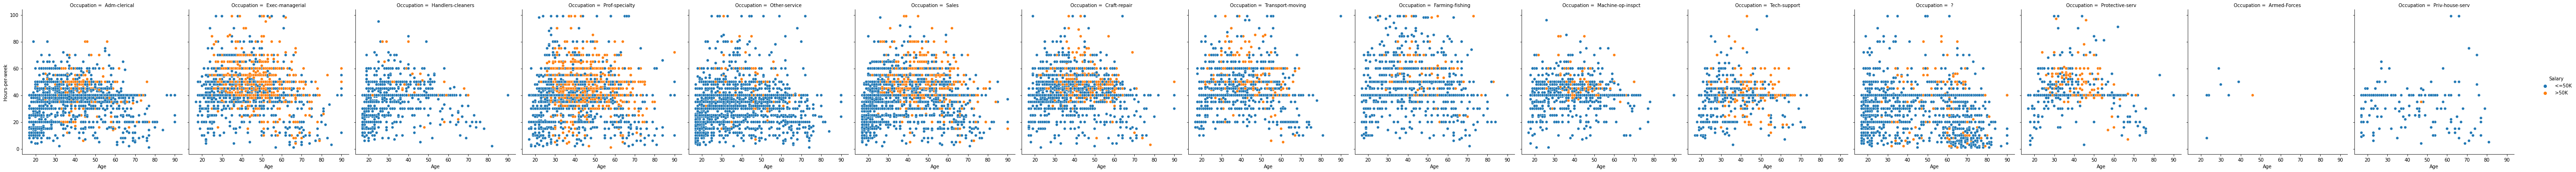

In [54]:
sns.relplot(data=dataframe,x='Age', y='Hours-per-week',col='Occupation',hue='Salary')

In [57]:
dataframe['Native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

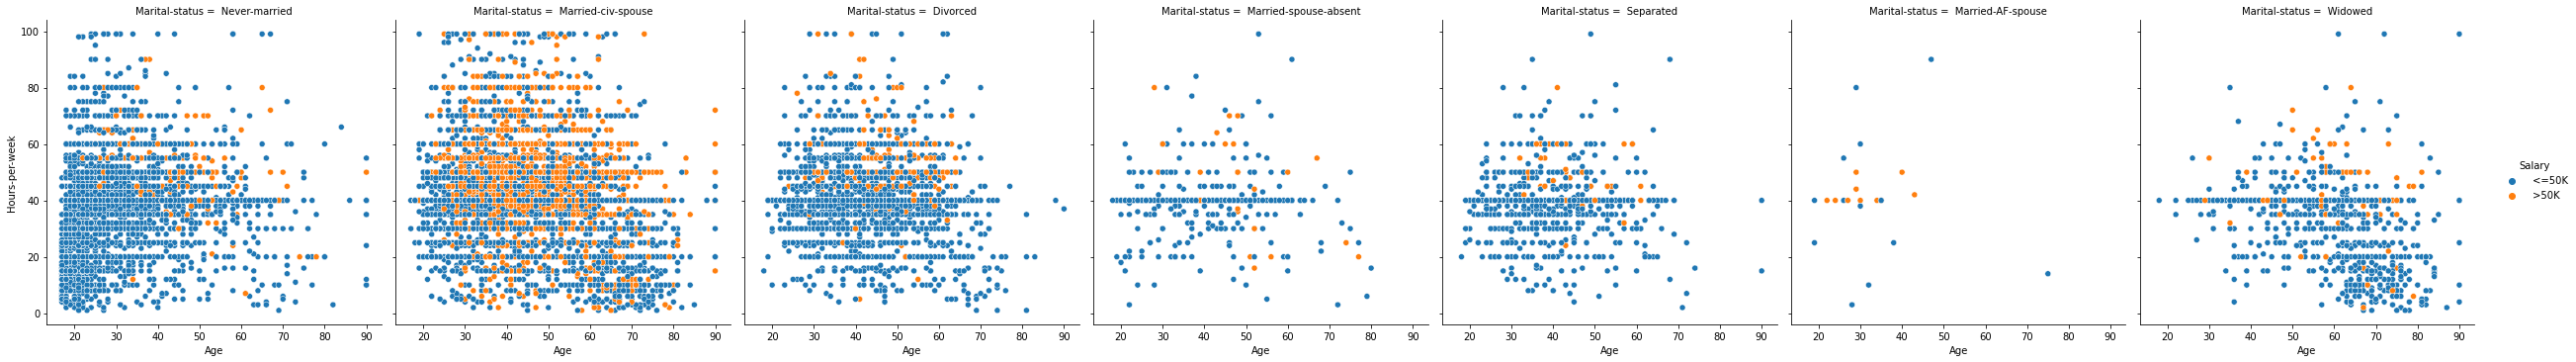

In [61]:
sns.relplot(data=dataframe, x='Age', y='Hours-per-week', hue='Salary', col='Marital-status')

### Split the Dataset

In [138]:
train, test=train_test_split(dataframe, test_size=0.2)
train, val=train_test_split(train, test_size=0.2)
print('Training Samples: ', len(train))
print('Testing Samples: ', len(test) )
print('Validation Samples: ', len(val))

Training Samples:  20838
Testing Samples:  6513
Validation Samples:  5210


In [139]:
train['Salary'].value_counts().plot()
test['Salary'].value_counts().plot()
val['Salary'].value_counts().plot()

KeyError: 'Salary'

#### Input pipeline using tf.data

In [143]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe=dataframe.copy()
    labels=dataframe.pop('Target')
    ds=tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    
    if shuffle:
        ds=ds.shuffle(buffer_size=len(dataframe))
    ds=ds.batch(batch_size)
    ds=ds.prefetch(batch_size)
    return ds

In [144]:
batch_size=10
train_ds=df_to_dataset(train, batch_size=batch_size)


In [120]:
#Let's take a look to the ppipeline
for feature_batch, label_batch in train_ds.take(1):
    print('Columns or Feature: ', feature_batch.keys())
    print('\n')
    print('Items in Marital-status', feature_batch['Marital-status'])
    print('\n')
    print('Labels: ', label_batch)

Columns or Feature:  dict_keys(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country'])


Items in Marital-status tf.Tensor(
[b' Married-civ-spouse' b' Married-spouse-absent' b' Never-married'
 b' Divorced' b' Never-married' b' Divorced' b' Divorced'
 b' Never-married' b' Divorced' b' Never-married'], shape=(10,), dtype=string)


Labels:  tf.Tensor(
[b' <=50K' b' <=50K' b' <=50K' b' >50K' b' <=50K' b' <=50K' b' <=50K'
 b' <=50K' b' <=50K' b' <=50K'], shape=(10,), dtype=string)


### Normalization of Numerical Feature

In [145]:
def get_normalization_layer(name, dataset):
    normalizer= preprocessing.Normalization(axis=None)
    feature_ds=dataset.map(lambda x,y: x[name])
    normalizer.adapt(feature_ds)
    return normalizer

### Categorical Column

In [146]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
    if dtype == 'string':
        index=preprocessing.StringLookup(max_tokens=max_tokens)
    else:
        index=preprocessing.IntegerLookup(max_tokens=max_tokens)
    
    feature_ds = dataset.map(lambda x, y: x[name])
    index.adapt(feature_ds)
    
    encoder=preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())
    
    return lambda feature: encoder(index(feature))



In [147]:
type_col=feature_batch['Sex']
layer=get_category_encoding_layer('Sex', train_ds, 'string')
layer(type_col)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 1.], dtype=float32)>

In [148]:
batch_size=256
train_ds=df_to_dataset(train, batch_size=batch_size)
test_ds=df_to_dataset(test, batch_size=batch_size)
val_ds=df_to_dataset(val, batch_size=batch_size)



In [149]:
all_inputs=[]
encoded_features=[]

# Numeric Features
for column in ['Age', 'fnlwgt', 'Capital-gain', 'Capital-loss', 'Hours-per-week']:
    numeric_col=tf.keras.Input(shape=(1,), name=column)
    normalization_layer=get_normalization_layer(column, train_ds)
    encoded_numeric_col=normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)
    

In [150]:
# Categorical Features Encoded as Integers

educational_num_col= tf.keras.Input(shape=(1,), name='Education-num', dtype='int64')
normalization_layer=get_category_encoding_layer('Education-num', train_ds, dtype='int64', max_tokens=5)
encoded_education_num_col=normalization_layer(educational_num_col)
all_inputs.append(educational_num_col)
encoded_features.append(encoded_education_num_col)

In [151]:
# Categorical Features Encoded as String:

for column in ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Sex', 'Race', 'Relationship', 'Native-country']:
    categorical_col=tf.keras.Input(shape=(1,), name=column, dtype='string')
    normalization_layer=get_category_encoding_layer(column, train_ds, dtype='string', max_tokens=5)
    encoded_categorical_col=normalization_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)


In [152]:
all_features=tf.keras.layers.concatenate(encoded_features)
x=tf.keras.layers.Dense(32, activation='relu',)(all_features)
x=tf.keras.layers.Dropout(0.5)(x)
output=tf.keras.layers.Dense(1)(x)
model=tf.keras.Model(all_inputs, output)
model.compile(optimizer='adam',
             loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [153]:
model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
82/82 [==============================] - 2s 10ms/step - loss: 0.5420 - accuracy: 0.7507 - val_loss: 0.4001 - val_accuracy: 0.7800
Epoch 2/20
82/82 [==============================] - 1s 5ms/step - loss: 0.4133 - accuracy: 0.7963 - val_loss: 0.3539 - val_accuracy: 0.8236
Epoch 3/20
82/82 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.8135 - val_loss: 0.3419 - val_accuracy: 0.8303
Epoch 4/20
82/82 [==============================] - 1s 4ms/step - loss: 0.3708 - accuracy: 0.8222 - val_loss: 0.3375 - val_accuracy: 0.8313
Epoch 5/20
82/82 [==============================] - 1s 5ms/step - loss: 0.3618 - accuracy: 0.8251 - val_loss: 0.3335 - val_accuracy: 0.8384
Epoch 6/20
82/82 [==============================] - 1s 9ms/step - loss: 0.3573 - accuracy: 0.8291 - val_loss: 0.3314 - val_accuracy: 0.8397
Epoch 7/20
82/82 [==============================] - 1s 5ms/step - loss: 0.3519 - accuracy: 0.8307 - val_loss: 0.3295 - val_accuracy: 0.8413
Epoch 8/20
82/82 [=